<a href="https://colab.research.google.com/github/Dhuvarrkesh/YouTube_Ad_View_Predictions/blob/main/youtube_adview_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
data_train=pd.read_csv('train.csv')
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

In [ ]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data_train['category'] = data_train['category'].map(category)
print(data_train.head())

       vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  14-09-2016  PT7M37S   
1  VID_14135       2     1707    56        2       6  01-10-2016  PT9M30S   
2   VID_2187       1     2023    25        0       2  02-07-2016  PT2M16S   
3  VID_23096       6   620860   777      161     153  27-07-2016  PT4M22S   
4  VID_10175       1      666     1        0       0  29-06-2016    PT31S   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  


In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [ ]:
data_train['views']=pd.to_numeric(data_train['views'])
data_train['comment']=pd.to_numeric(data_train['comment'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['adview']=pd.to_numeric(data_train['adview'])

In [ ]:
  column_vidid=data_train['vidid']

  from sklearn.preprocessing import LabelEncoder
  data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
  data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
  data_train['published']=LabelEncoder().fit_transform(data_train['published'])
  data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9005,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [ ]:
import datetime
import time

In [ ]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv('train.csv')
mp=pd.read_csv('train.csv')['duration']
time=mp.apply(checki)

def func_sec(time_string):
  h,m,s=time_string.split(':')
  return int(h)*3600 + int(m)*60+int(s)
time1=time.apply(func_sec)
data_train['duration']=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9005,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


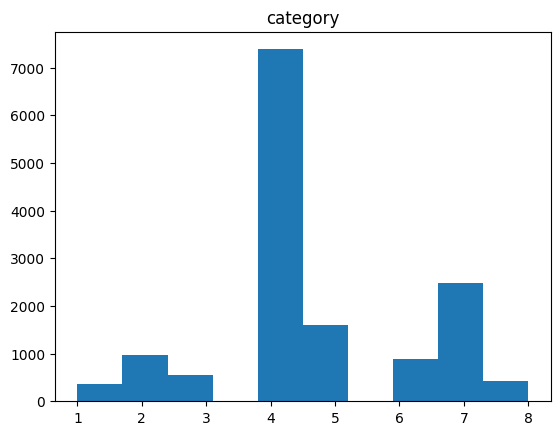

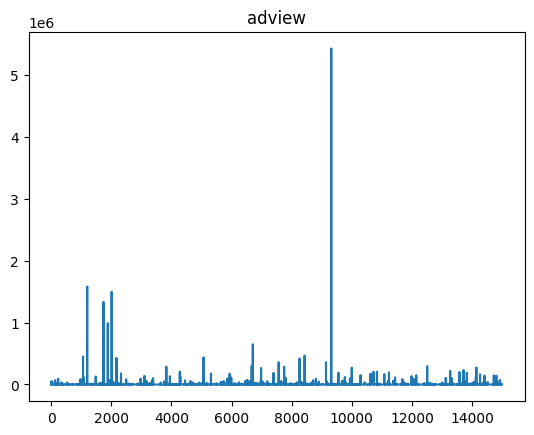

In [ ]:
plt.hist(data_train['category'])
plt.title('category')
plt.show()
plt.plot(data_train['adview'])
plt.title('adview')
plt.show()

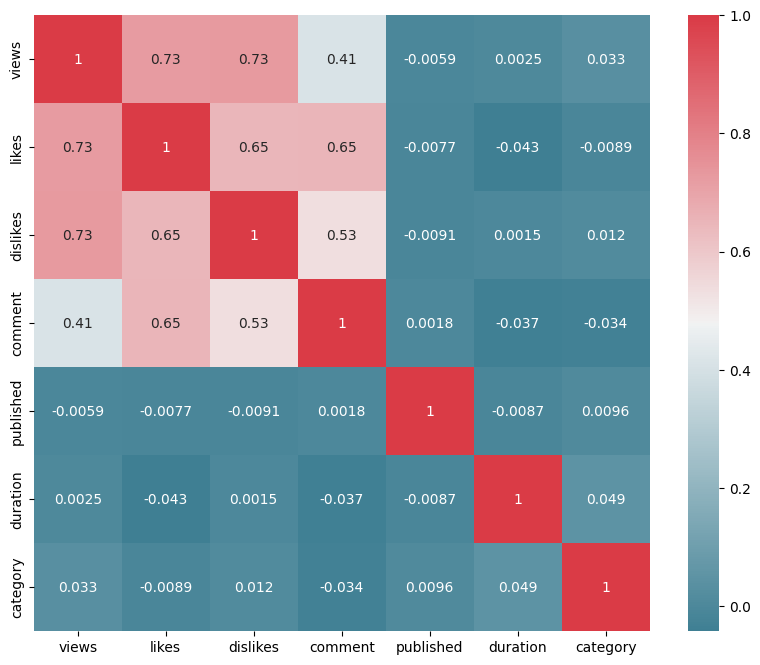

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [ ]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11709, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15380107118270742

In [ ]:
from sklearn import metrics
def print_error(X_test,y_test,model_name):
  prediction=model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5058.758073793538
Mean Squared Error: 10890904457.48204
Root Mean Squared Error: 104359.49624965637


In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

Mean Absolute Error: 7847.048155737705
Mean Squared Error: 13954364969.526299
Root Mean Squared Error: 118128.5950543995


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 5058.758073793538
Mean Squared Error: 10890904457.48204
Root Mean Squared Error: 104359.49624965637


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf
)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

<ipython-input-34-22c01ef75d6b>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error: 5644.738418618354
Mean Squared Error: 10983440889.368135
Root Mean Squared Error: 104801.91262266226


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=10)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/10
366/366 [==============================] - 1s 2ms/step - loss: 767618368.0000 - mean_squared_error: 767618368.0000
Epoch 2/10
366/366 [==============================] - 1s 2ms/step - loss: 767613888.0000 - mean_squared_error: 767613888.0000
Epoch 3/10
366/366 [==============================] - 1s 2ms/step - loss: 767603008.0000 - mean_squared_error: 767603008.0000
Epoch 4/10
366/366 [==============================] - 1s 2ms/step - loss: 767583232.0000 - mean_squared_error: 767583232.0000
Epoch 5/10
366/366 [==============================] - 1s 3ms/step - loss: 767553792.0000 - mean_squared_error: 767553792.0000
Epoch 6/10
366/366 [==============================] - 1s 2ms/step - loss: 767512576.0000 - mean_squared_error: 767512576.0000
Epoch 7/10
366/366 [==============================] - 1s 2ms/step - loss: 767463872.0000 - mean_squared_error: 767463872.0000
Epoch 8/10
366/366 [==============================] - 1s 4ms/step - loss: 767407360.0000 - mean_squared_error: 7674073

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(linear_regression, "linearregression_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
